In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 30 20:11:19 2016

@author: stephen
"""

import sys

sys.path.append("../")
import utils
import time
from tensorflow import keras
# from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(813306)

start = time.time()


def readucr(filename):
    data = np.loadtxt(filename)
    Y = data[:, 0]
    X = data[:, 1:]
    return X, Y


epochs = 2000


flist = ["../../datasets/GunPoint/GunPoint"]

for each in flist:
    fname = each
    x_train, y_train = readucr(fname + "_TRAIN.txt")
    x_test, y_test = readucr(fname + "_TEST.txt")
    nb_classes = len(np.unique(y_test))
    batch_size = int(min(x_train.shape[0] / 10, 16))

    y_train = (
        (y_train - y_train.min()) / (y_train.max() - y_train.min()) * (nb_classes - 1)
    )
    y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min()) * (nb_classes - 1)

    Y_train = keras.utils.to_categorical(y_train, nb_classes)
    Y_test = keras.utils.to_categorical(y_test, nb_classes)

    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean) / (x_train_std)

    x_test = (x_test - x_train_mean) / (x_train_std)
    x_train = x_train.reshape(x_train.shape + (1, 1,))
    x_test = x_test.reshape(x_test.shape + (1, 1,))

    x = keras.layers.Input(x_train.shape[1:])
    #    drop_out = Dropout(0.2)(x)
    conv1 = keras.layers.Conv2D(128, 8, 1, padding="same")(x)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)

    #    drop_out = Dropout(0.2)(conv1)
    conv2 = keras.layers.Conv2D(256, 5, 1, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation("relu")(conv2)

    #    drop_out = Dropout(0.2)(conv2)
    conv3 = keras.layers.Conv2D(128, 3, 1, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)

    full = keras.layers.GlobalAveragePooling2D()(conv3)
    out = keras.layers.Dense(nb_classes, activation="softmax")(full)

    model = keras.models.Model(inputs=x, outputs=out)

    optimizer = keras.optimizers.Adam()
    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=50, min_lr=0.0001
    )
    hist = model.fit(
        x_train,
        Y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(x_test, Y_test),
        callbacks=[reduce_lr],
    )

elapsed_time = time.time() - start
model.save("../data/FCN.h5")

Epoch 1/2000
10/10 [==============================] - 13s 548ms/step - loss: 0.8723 - accuracy: 0.5200 - val_loss: 0.6917 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 2/2000
10/10 [==============================] - 3s 340ms/step - loss: 0.6510 - accuracy: 0.6400 - val_loss: 0.7087 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 3/2000
10/10 [==============================] - 3s 300ms/step - loss: 0.6368 - accuracy: 0.5400 - val_loss: 0.7063 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 4/2000
10/10 [==============================] - 3s 316ms/step - loss: 0.6308 - accuracy: 0.6800 - val_loss: 0.7077 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 5/2000
10/10 [==============================] - 3s 325ms/step - loss: 0.5965 - accuracy: 0.7200 - val_loss: 0.7102 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 6/2000
10/10 [==============================] - 3s 293ms/step - loss: 0.6048 - accuracy: 0.6200 - val_loss: 0.7056 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 7/2000
10/10 [==============================] - 3s 

Epoch 53/2000
10/10 [==============================] - 3s 316ms/step - loss: 0.2845 - accuracy: 0.9400 - val_loss: 1.3775 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 54/2000
10/10 [==============================] - 3s 358ms/step - loss: 0.3306 - accuracy: 0.8600 - val_loss: 1.2648 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 55/2000
10/10 [==============================] - 3s 305ms/step - loss: 0.3805 - accuracy: 0.8200 - val_loss: 0.9318 - val_accuracy: 0.5400 - lr: 0.0010
Epoch 56/2000
10/10 [==============================] - 3s 343ms/step - loss: 0.3531 - accuracy: 0.8600 - val_loss: 1.0360 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 57/2000
10/10 [==============================] - 3s 321ms/step - loss: 0.3299 - accuracy: 0.8400 - val_loss: 0.5082 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 58/2000
10/10 [==============================] - 3s 298ms/step - loss: 0.3215 - accuracy: 0.9000 - val_loss: 1.6461 - val_accuracy: 0.5733 - lr: 0.0010
Epoch 59/2000
10/10 [==============================]

Epoch 105/2000
10/10 [==============================] - 3s 301ms/step - loss: 0.1613 - accuracy: 0.9600 - val_loss: 1.2159 - val_accuracy: 0.5400 - lr: 0.0010
Epoch 106/2000
10/10 [==============================] - 3s 270ms/step - loss: 0.1443 - accuracy: 0.9800 - val_loss: 0.5517 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 107/2000
10/10 [==============================] - 3s 278ms/step - loss: 0.1722 - accuracy: 0.9600 - val_loss: 0.9487 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 108/2000
10/10 [==============================] - 3s 262ms/step - loss: 0.2645 - accuracy: 0.8400 - val_loss: 0.2741 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 109/2000
10/10 [==============================] - 2s 254ms/step - loss: 0.1476 - accuracy: 1.0000 - val_loss: 0.3747 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 110/2000
10/10 [==============================] - 3s 306ms/step - loss: 0.1980 - accuracy: 0.9200 - val_loss: 0.3791 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 111/2000
10/10 [========================

10/10 [==============================] - 3s 316ms/step - loss: 0.0794 - accuracy: 1.0000 - val_loss: 0.6254 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 157/2000
10/10 [==============================] - 3s 275ms/step - loss: 0.1056 - accuracy: 0.9800 - val_loss: 1.1613 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 158/2000
10/10 [==============================] - 2s 246ms/step - loss: 0.0775 - accuracy: 1.0000 - val_loss: 0.3946 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 159/2000
10/10 [==============================] - 3s 322ms/step - loss: 0.0856 - accuracy: 0.9800 - val_loss: 0.2814 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 160/2000
10/10 [==============================] - 2s 256ms/step - loss: 0.2172 - accuracy: 0.9000 - val_loss: 0.5432 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 161/2000
10/10 [==============================] - 2s 257ms/step - loss: 0.1706 - accuracy: 0.9000 - val_loss: 0.1304 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 162/2000
10/10 [==============================] - 3s 30

10/10 [==============================] - 3s 298ms/step - loss: 0.0624 - accuracy: 0.9800 - val_loss: 0.0997 - val_accuracy: 0.9800 - lr: 5.0000e-04
Epoch 208/2000
10/10 [==============================] - 3s 270ms/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.1198 - val_accuracy: 0.9733 - lr: 5.0000e-04
Epoch 209/2000
10/10 [==============================] - 2s 256ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9867 - lr: 5.0000e-04
Epoch 210/2000
10/10 [==============================] - 3s 314ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy: 0.9533 - lr: 5.0000e-04
Epoch 211/2000
10/10 [==============================] - 3s 271ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9333 - lr: 5.0000e-04
Epoch 212/2000
10/10 [==============================] - 3s 272ms/step - loss: 0.0774 - accuracy: 0.9800 - val_loss: 0.0893 - val_accuracy: 0.9600 - lr: 5.0000e-04
Epoch 213/2000
10/10 [===============

10/10 [==============================] - 3s 269ms/step - loss: 0.0521 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9867 - lr: 5.0000e-04
Epoch 258/2000
10/10 [==============================] - 2s 258ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 259/2000
10/10 [==============================] - 3s 320ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9733 - lr: 5.0000e-04
Epoch 260/2000
10/10 [==============================] - 3s 265ms/step - loss: 0.0745 - accuracy: 0.9800 - val_loss: 0.0643 - val_accuracy: 0.9800 - lr: 5.0000e-04
Epoch 261/2000
10/10 [==============================] - 3s 267ms/step - loss: 0.0539 - accuracy: 1.0000 - val_loss: 0.1842 - val_accuracy: 0.9467 - lr: 5.0000e-04
Epoch 262/2000
10/10 [==============================] - 3s 310ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9800 - lr: 5.0000e-04
Epoch 263/2000
10/10 [===============

10/10 [==============================] - 2s 243ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0469 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 308/2000
10/10 [==============================] - 3s 274ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9867 - lr: 5.0000e-04
Epoch 309/2000
10/10 [==============================] - 3s 278ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9533 - lr: 2.5000e-04
Epoch 310/2000
10/10 [==============================] - 3s 269ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9600 - lr: 2.5000e-04
Epoch 311/2000
10/10 [==============================] - 3s 297ms/step - loss: 0.1073 - accuracy: 0.9800 - val_loss: 0.1123 - val_accuracy: 0.9533 - lr: 2.5000e-04
Epoch 312/2000
10/10 [==============================] - 2s 259ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9733 - lr: 2.5000e-04
Epoch 313/2000
10/10 [===============

10/10 [==============================] - 2s 256ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 358/2000
10/10 [==============================] - 2s 242ms/step - loss: 0.0486 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 359/2000
10/10 [==============================] - 3s 299ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9800 - lr: 2.5000e-04
Epoch 360/2000
10/10 [==============================] - 2s 257ms/step - loss: 0.0949 - accuracy: 0.9600 - val_loss: 0.0853 - val_accuracy: 0.9800 - lr: 2.5000e-04
Epoch 361/2000
10/10 [==============================] - 2s 250ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.2252 - val_accuracy: 0.9067 - lr: 2.5000e-04
Epoch 362/2000
10/10 [==============================] - 3s 292ms/step - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.4868 - val_accuracy: 0.7600 - lr: 2.5000e-04
Epoch 363/2000
10/10 [===============

10/10 [==============================] - 3s 271ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 408/2000
10/10 [==============================] - 3s 286ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 409/2000
10/10 [==============================] - 3s 283ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.0269 - val_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 410/2000
10/10 [==============================] - 2s 253ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9867 - lr: 1.2500e-04
Epoch 411/2000
10/10 [==============================] - 3s 279ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 412/2000
10/10 [==============================] - 3s 295ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.0214 - val_accuracy: 1.0000 - lr: 1.2500e-04
Epoch 413/2000
10/10 [===============

10/10 [==============================] - 2s 250ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9933 - lr: 1.2500e-04
Epoch 458/2000
10/10 [==============================] - 3s 281ms/step - loss: 0.1382 - accuracy: 0.9000 - val_loss: 0.1813 - val_accuracy: 0.9200 - lr: 1.2500e-04
Epoch 459/2000
10/10 [==============================] - 3s 281ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy: 0.9733 - lr: 1.2500e-04
Epoch 460/2000
10/10 [==============================] - 3s 268ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 0.9867 - lr: 1.2500e-04
Epoch 461/2000
10/10 [==============================] - 2s 246ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0329 - val_accuracy: 0.9867 - lr: 1.2500e-04
Epoch 462/2000
10/10 [==============================] - 1s 142ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9933 - lr: 1.2500e-04
Epoch 463/2000
10/10 [===============

10/10 [==============================] - 1s 116ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 508/2000
10/10 [==============================] - 1s 133ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 509/2000
10/10 [==============================] - 1s 138ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 510/2000
10/10 [==============================] - 1s 122ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 511/2000
10/10 [==============================] - 1s 151ms/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 512/2000
10/10 [==============================] - 1s 124ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 513/2000
10/10 [===============

10/10 [==============================] - 3s 301ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 558/2000
10/10 [==============================] - 3s 272ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 559/2000
10/10 [==============================] - 3s 285ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 560/2000
10/10 [==============================] - 3s 294ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 561/2000
10/10 [==============================] - 2s 253ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 562/2000
10/10 [==============================] - 3s 298ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 563/2000
10/10 [===============

10/10 [==============================] - 1s 116ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 608/2000
10/10 [==============================] - 1s 154ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 609/2000
10/10 [==============================] - 1s 129ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 610/2000
10/10 [==============================] - 1s 131ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 611/2000
10/10 [==============================] - 1s 146ms/step - loss: 0.0414 - accuracy: 0.9800 - val_loss: 0.0204 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 612/2000
10/10 [==============================] - 1s 122ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 613/2000
10/10 [===============

10/10 [==============================] - 1s 130ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 658/2000
10/10 [==============================] - 1s 146ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 659/2000
10/10 [==============================] - 1s 120ms/step - loss: 0.0307 - accuracy: 0.9800 - val_loss: 0.0786 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 660/2000
10/10 [==============================] - 1s 137ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1248 - val_accuracy: 0.9533 - lr: 1.0000e-04
Epoch 661/2000
10/10 [==============================] - 1s 136ms/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.0525 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 662/2000
10/10 [==============================] - 1s 113ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 663/2000
10/10 [===============

10/10 [==============================] - 1s 124ms/step - loss: 0.0365 - accuracy: 0.9800 - val_loss: 0.0203 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 708/2000
10/10 [==============================] - 1s 121ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 709/2000
10/10 [==============================] - 1s 148ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 710/2000
10/10 [==============================] - 1s 112ms/step - loss: 0.0394 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 711/2000
10/10 [==============================] - 1s 134ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 712/2000
10/10 [==============================] - 1s 145ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 713/2000
10/10 [===============

10/10 [==============================] - 1s 156ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 758/2000
10/10 [==============================] - 1s 134ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 759/2000
10/10 [==============================] - 1s 118ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 760/2000
10/10 [==============================] - 2s 161ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 761/2000
10/10 [==============================] - 1s 116ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 762/2000
10/10 [==============================] - 1s 131ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 763/2000
10/10 [===============

10/10 [==============================] - 1s 114ms/step - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 808/2000
10/10 [==============================] - 1s 156ms/step - loss: 0.0689 - accuracy: 0.9600 - val_loss: 0.0223 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 809/2000
10/10 [==============================] - 1s 138ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 810/2000
10/10 [==============================] - 1s 118ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 811/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 812/2000
10/10 [==============================] - 1s 126ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 813/2000
10/10 [===============

10/10 [==============================] - 1s 146ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 858/2000
10/10 [==============================] - 1s 116ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 859/2000
10/10 [==============================] - 1s 126ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 860/2000
10/10 [==============================] - 1s 141ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 861/2000
10/10 [==============================] - 1s 112ms/step - loss: 0.0268 - accuracy: 0.9800 - val_loss: 0.0163 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 862/2000
10/10 [==============================] - 1s 134ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 863/2000
10/10 [===============

10/10 [==============================] - 1s 144ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 908/2000
10/10 [==============================] - 1s 140ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 909/2000
10/10 [==============================] - 1s 118ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 910/2000
10/10 [==============================] - 1s 149ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 911/2000
10/10 [==============================] - 1s 124ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 912/2000
10/10 [==============================] - 1s 133ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 913/2000
10/10 [===============

10/10 [==============================] - 1s 137ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 958/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 959/2000
10/10 [==============================] - 1s 119ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 960/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 961/2000
10/10 [==============================] - 1s 129ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 962/2000
10/10 [==============================] - 1s 124ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 963/2000
10/10 [===============

10/10 [==============================] - 2s 202ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1008/2000
10/10 [==============================] - 2s 200ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 1009/2000
10/10 [==============================] - 2s 241ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 1010/2000
10/10 [==============================] - 2s 196ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1011/2000
10/10 [==============================] - 2s 220ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1012/2000
10/10 [==============================] - 2s 235ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1013/2000
10/10 [=========

10/10 [==============================] - 1s 124ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1058/2000
10/10 [==============================] - 1s 151ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1059/2000
10/10 [==============================] - 1s 127ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 1060/2000
10/10 [==============================] - 1s 135ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1061/2000
10/10 [==============================] - 2s 160ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1062/2000
10/10 [==============================] - 1s 123ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1063/2000
10/10 [=========

10/10 [==============================] - 1s 151ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1108/2000
10/10 [==============================] - 1s 135ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1109/2000
10/10 [==============================] - 2s 177ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1110/2000
10/10 [==============================] - 1s 146ms/step - loss: 0.0297 - accuracy: 0.9800 - val_loss: 0.0101 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1111/2000
10/10 [==============================] - 1s 143ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1112/2000
10/10 [==============================] - 2s 164ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 1113/2000
10/10 [=========

10/10 [==============================] - 1s 135ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1158/2000
10/10 [==============================] - 2s 173ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1159/2000
10/10 [==============================] - 1s 132ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1160/2000
10/10 [==============================] - 2s 172ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1161/2000
10/10 [==============================] - 2s 177ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1162/2000
10/10 [==============================] - 1s 151ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1163/2000
10/10 [=========

10/10 [==============================] - 1s 130ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1208/2000
10/10 [==============================] - 1s 127ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1209/2000
10/10 [==============================] - 1s 150ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1210/2000
10/10 [==============================] - 1s 108ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1211/2000
10/10 [==============================] - 1s 132ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1212/2000
10/10 [==============================] - 1s 145ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1213/2000
10/10 [=========

Epoch 1257/2000
10/10 [==============================] - 2s 170ms/step - loss: 7.1801e-04 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1258/2000
10/10 [==============================] - 1s 129ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1259/2000
10/10 [==============================] - 1s 146ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1260/2000
10/10 [==============================] - 2s 162ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1261/2000
10/10 [==============================] - 1s 125ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1262/2000
10/10 [==============================] - 2s 162ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1263/2

Epoch 1307/2000
10/10 [==============================] - 1s 123ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1308/2000
10/10 [==============================] - 1s 143ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1309/2000
10/10 [==============================] - 1s 143ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1310/2000
10/10 [==============================] - 1s 125ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1311/2000
10/10 [==============================] - 2s 161ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1312/2000
10/10 [==============================] - 1s 140ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1313/2000


Epoch 1357/2000
10/10 [==============================] - 2s 166ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1358/2000
10/10 [==============================] - 1s 125ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1359/2000
10/10 [==============================] - 1s 153ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1360/2000
10/10 [==============================] - 1s 142ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1361/2000
10/10 [==============================] - 1s 120ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1362/2000
10/10 [==============================] - 1s 155ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1363/2000


Epoch 1407/2000
10/10 [==============================] - 1s 124ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1408/2000
10/10 [==============================] - 2s 165ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1409/2000
10/10 [==============================] - 1s 140ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1410/2000
10/10 [==============================] - 1s 127ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1411/2000
10/10 [==============================] - 2s 184ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1412/2000
10/10 [==============================] - 1s 123ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1413/2000


Epoch 1457/2000
10/10 [==============================] - 2s 173ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1458/2000
10/10 [==============================] - 1s 135ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1459/2000
10/10 [==============================] - 2s 174ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1460/2000
10/10 [==============================] - 1s 150ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1461/2000
10/10 [==============================] - 1s 141ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1462/2000
10/10 [==============================] - 2s 173ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1463/2000


Epoch 1507/2000
10/10 [==============================] - 1s 137ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1508/2000
10/10 [==============================] - 2s 174ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1509/2000
10/10 [==============================] - 1s 141ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1510/2000
10/10 [==============================] - 1s 146ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1511/2000
10/10 [==============================] - 2s 170ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1512/2000
10/10 [==============================] - 1s 131ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1513/2000


Epoch 1557/2000
10/10 [==============================] - 2s 164ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1558/2000
10/10 [==============================] - 1s 135ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1559/2000
10/10 [==============================] - 2s 175ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1560/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1561/2000
10/10 [==============================] - 1s 152ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1562/2000
10/10 [==============================] - 2s 175ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1563/2000


Epoch 1607/2000
10/10 [==============================] - 2s 170ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1608/2000
10/10 [==============================] - 1s 155ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1609/2000
10/10 [==============================] - 1s 137ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1610/2000
10/10 [==============================] - 2s 176ms/step - loss: 6.0923e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1611/2000
10/10 [==============================] - 1s 142ms/step - loss: 4.3589e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1612/2000
10/10 [==============================] - 1s 149ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 16

Epoch 1657/2000
10/10 [==============================] - 2s 169ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1658/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9800 - lr: 1.0000e-04
Epoch 1659/2000
10/10 [==============================] - 2s 173ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1971 - val_accuracy: 0.9200 - lr: 1.0000e-04
Epoch 1660/2000
10/10 [==============================] - 1s 153ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1661/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1662/2000
10/10 [==============================] - 2s 181ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 1663/2000


Epoch 1707/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 1708/2000
10/10 [==============================] - 2s 161ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1709/2000
10/10 [==============================] - 1s 116ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1710/2000
10/10 [==============================] - 2s 179ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1711/2000
10/10 [==============================] - 2s 161ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1712/2000
10/10 [==============================] - 1s 141ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1713/2000


Epoch 1757/2000
10/10 [==============================] - 1s 144ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1758/2000
10/10 [==============================] - 1s 152ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1759/2000
10/10 [==============================] - 2s 169ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1760/2000
10/10 [==============================] - 1s 132ms/step - loss: 8.5175e-04 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1761/2000
10/10 [==============================] - 2s 163ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1762/2000
10/10 [==============================] - 2s 158ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1763/2

Epoch 1807/2000
10/10 [==============================] - 2s 177ms/step - loss: 9.1144e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1808/2000
10/10 [==============================] - 1s 134ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1809/2000
10/10 [==============================] - 1s 129ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1810/2000
10/10 [==============================] - 2s 178ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1811/2000
10/10 [==============================] - 1s 129ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1812/2000
10/10 [==============================] - 2s 166ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1813/2

Epoch 1857/2000
10/10 [==============================] - 1s 152ms/step - loss: 6.5272e-04 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1858/2000
10/10 [==============================] - 1s 142ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1859/2000
10/10 [==============================] - 2s 181ms/step - loss: 4.6958e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1860/2000
10/10 [==============================] - 1s 139ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1861/2000
10/10 [==============================] - 2s 165ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1862/2000
10/10 [==============================] - 2s 164ms/step - loss: 5.5345e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoc

10/10 [==============================] - 1s 136ms/step - loss: 9.9789e-04 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1907/2000
10/10 [==============================] - 1s 158ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1908/2000
10/10 [==============================] - 2s 164ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1909/2000
10/10 [==============================] - 1s 137ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1910/2000
10/10 [==============================] - 2s 181ms/step - loss: 8.0524e-04 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1911/2000
10/10 [==============================] - 1s 151ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 1912/2000
10/10 [=

Epoch 1956/2000
10/10 [==============================] - 2s 173ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1957/2000
10/10 [==============================] - 1s 133ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1958/2000
10/10 [==============================] - 1s 157ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1959/2000
10/10 [==============================] - 2s 166ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1960/2000
10/10 [==============================] - 1s 141ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1961/2000
10/10 [==============================] - 2s 174ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 1962/2000


In [2]:
# evaluate the model
_, train_acc = model.evaluate(x_train, Y_train)
_, test_acc = model.evaluate(x_test, Y_test)

5/5 [==============================] - 1s 82ms/step - loss: 0.0057 - accuracy: 1.0000


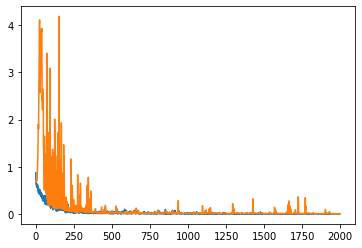

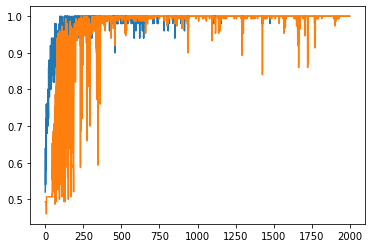

In [3]:
utils.save_model_stats(
    "FCN",
    hist.history["loss"],
    hist.history["val_loss"],
    hist.history["accuracy"],
    hist.history["val_accuracy"],
    elapsed_time,
)

In [4]:
y_pred_test = model.predict(x=x_test)
y_pred_train = model.predict(x=x_train)

pd.DataFrame(y_pred_test, columns=["pred_proba1", "pred_proba2"]).to_csv("../data/FCN/test_pred.csv", index=False)
pd.DataFrame(y_pred_train, columns=["pred_proba1", "pred_proba2"]).to_csv("../data/FCN/train_pred.csv", index=False)